In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import requests
import os
from PIL import Image
import glob

In [2]:
def show_image(img):
    '''matplotlib expects img in RGB format but OpenCV provides it in BGR so switch it around'''
    plt.figure()
    plt.imshow(img[:,:,::-1])

## Demo of the face detection algorithm

In [3]:
face_cascade_url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml'
eye_cascade_url = 'https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_eye.xml'

for c in [face_cascade_url, eye_cascade_url]:
    with open(os.path.split(c)[1], 'wb') as f:
        r = requests.get(c)
        f.write(r.content)

In [4]:
test_img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Lily_Cole_2012.jpg/557px-Lily_Cole_2012.jpg'
test_img_path = os.path.split(test_img_url)[1]
with open(test_img_path, 'wb') as f:
    r = requests.get(test_img_url)
    f.write(r.content)

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread(test_img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
show_image(img)

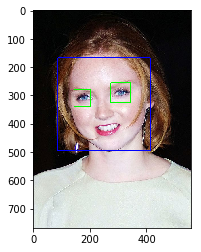

In [7]:
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
for (x,y,w,h) in faces:
    labelled_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
show_image(labelled_img)

## Crop the image to just the face with some padding around it
Provided that there is only one face found in the image and there are two eyes. Otherwise delete it.

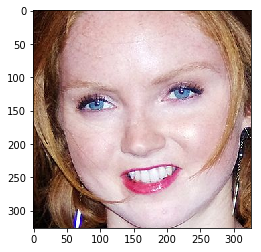

In [8]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread(test_img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.1, 5)
if len(faces) != 1:
    print('{n} faces detected - deleting file'.format(n=len(faces)))
    #show_image(img)
    os.remove(img_path)
else:
    (x,y,w,h) = faces[0]
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) != 2:
        print('{n} eyes detected - deleting file'.format(n=len(eyes)))
        os.remove(img_path)
    else:
        cropped_img1 = img[y:y+h, x:x+w]
        show_image(cropped_img1)
        cy1 = int(max(0, y - (0.5*h)))
        cy2 = int(min(y + (1.5*h), img.shape[0]))
        cx1 = int(max(0, x - (0.5*w)))
        cx2 = int(min(x + (1.5*w), img.shape[1]))
        cropped_img2 = img[cy1:cy2, cx1:cx2]
        show_image(cropped_img2)

## Run it on our dataset

The restriction to 1 face and 2 eyes was throwing away a lot of images that should have been fine.

I guess this method of face detection alone is not sufficient. I'm sure improvements can be made by combining with additional algorithms or models but for this task, it's ok if we lose some good images and I'll prefer to throw away too many images than to keep some bad ones.

Now create a function and run it across the train and valid directories...

In [9]:
def crop_to_face(img_path):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

    img = cv2.imread(img_path)
    
    if img is None:
        os.remove(img_path)
    else:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.1, 10)
        if len(faces) > 1:
            print('{n} faces detected - deleting file'.format(n=len(faces)))
            #show_image(img)
            os.remove(img_path)
        elif len(faces) == 1:
            (x,y,w,h) = faces[0]
            #cropped_img = img[y:y+h, x:x+w]
            #show_image(cropped_img)
            cy1 = int(max(0, y - (0.5*h)))
            cy2 = int(min(y + (1.5*h), img.shape[0]))
            cx1 = int(max(0, x - (0.5*w)))
            cx2 = int(min(x + (1.5*w), img.shape[1]))
            cropped_img_padded = img[cy1:cy2, cx1:cx2]
            #show_image(cropped_img_padded)
            cv2.imwrite(img_path, cropped_img_padded)

In [10]:
imgs_dir = './Images/'
img_files = []
for dirpath, dirnames, filenames in os.walk(imgs_dir):
    for filename in [f for f in filenames if f.endswith("jpg")]:
        img_files.append(os.path.join(dirpath, filename))

2 faces detected - deleting file
2 faces detected - deleting file
4 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
3 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces detected - deleting file
2 faces de

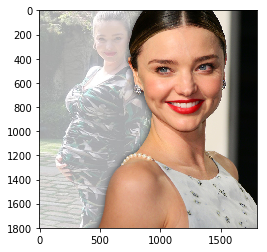

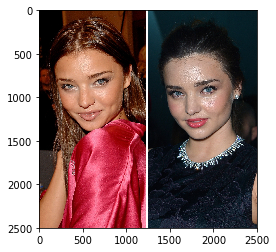

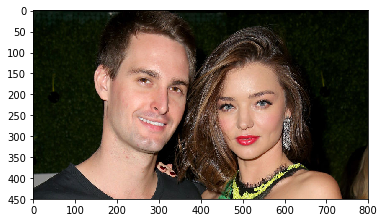

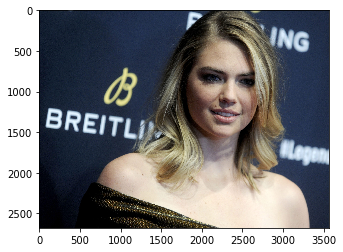

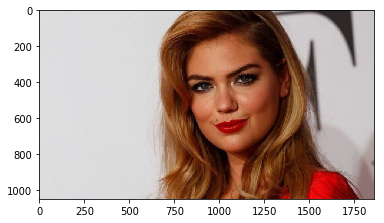

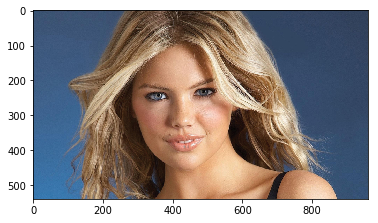

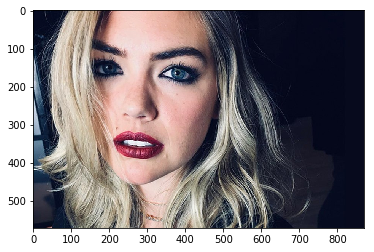

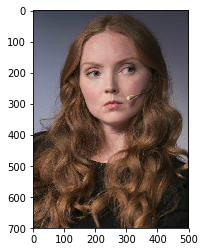

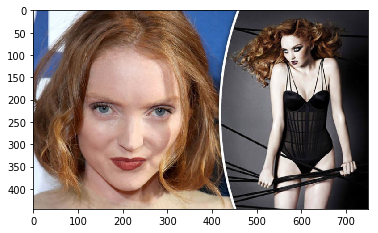

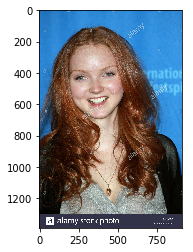

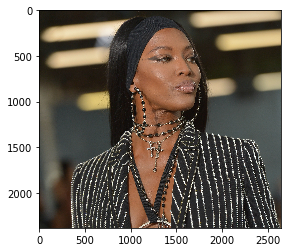

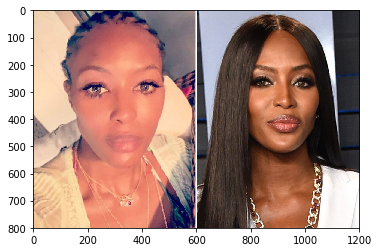

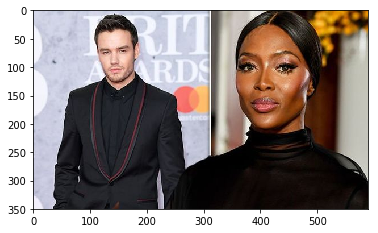

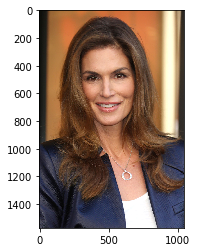

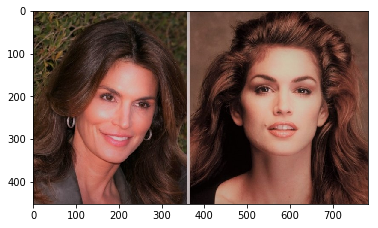

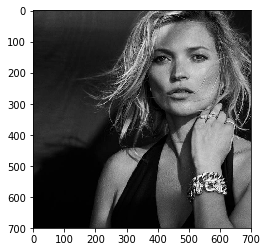

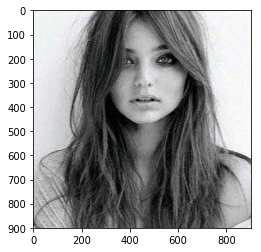

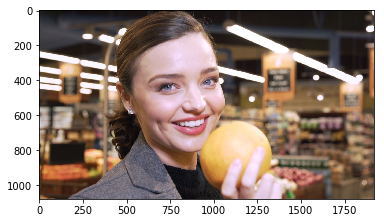

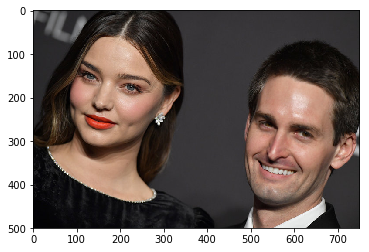

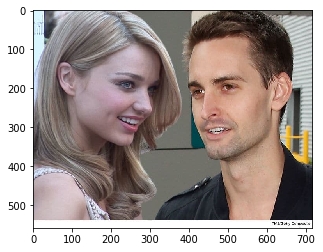

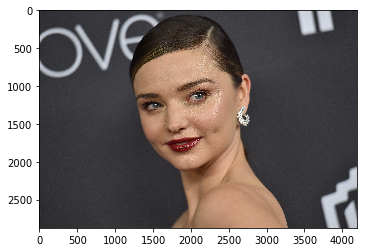

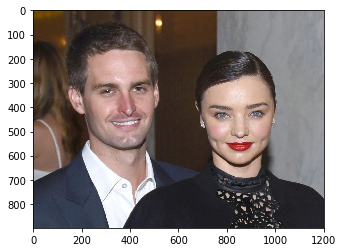

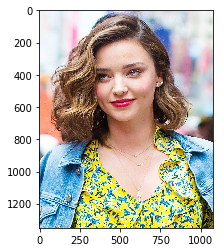

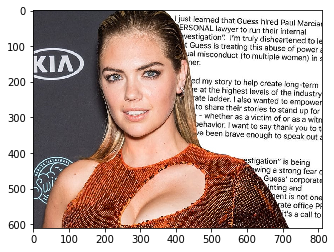

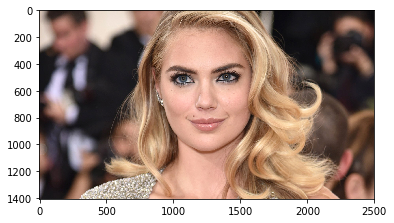

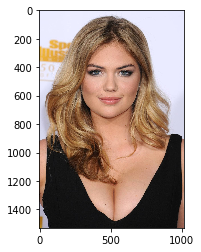

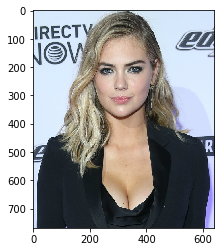

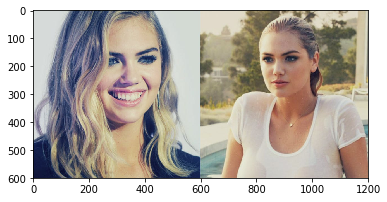

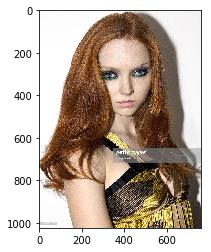

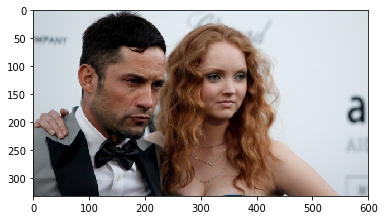

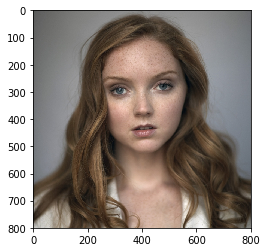

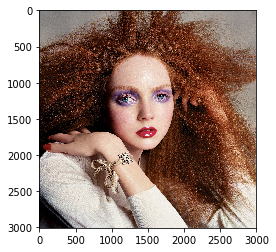

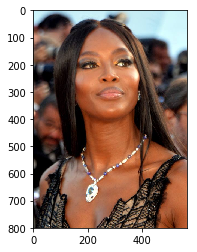

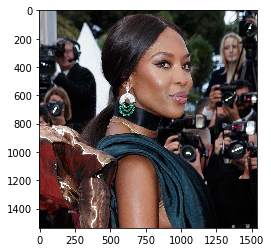

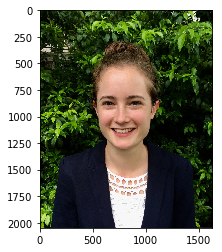

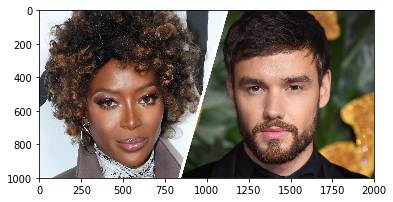

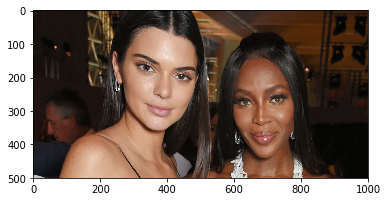

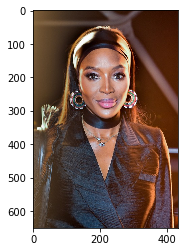

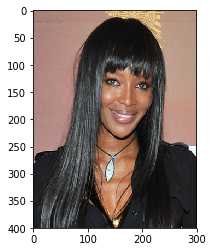

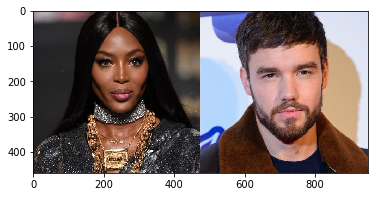

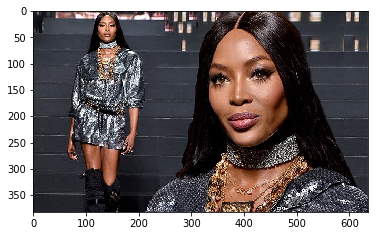

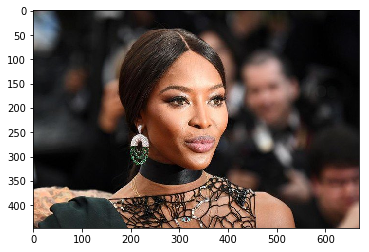

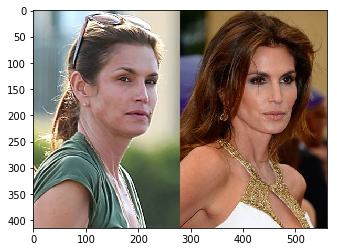

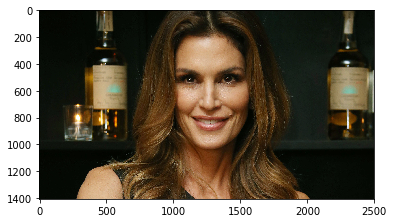

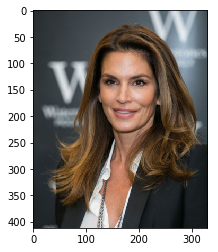

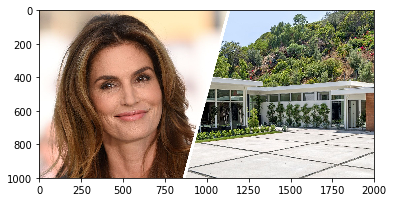

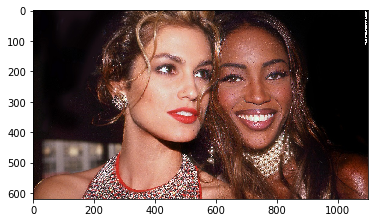

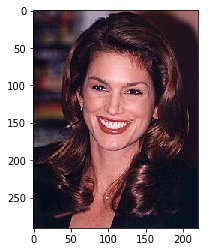

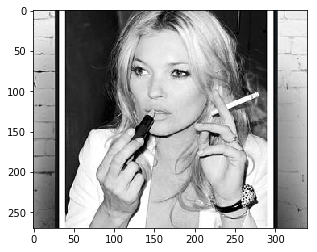

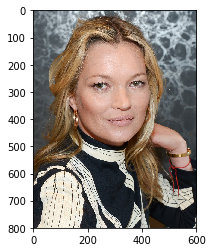

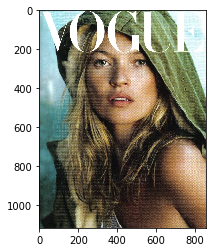

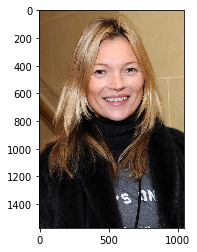

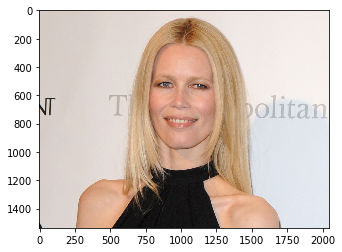

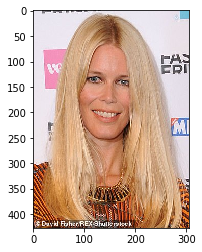

In [11]:
for img_path in img_files:
    crop_to_face(img_path)